In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = ResourceWarning)
warnings.filterwarnings('ignore', category = BytesWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [3]:
## Use only one CPU, no multi-tasking. Multi-tasking is bad here, just like in real life!

In [3]:
db = '/scratch/x77/db6174/mom/archive/databases/025deg_jra55_ryf/cc_database_flux_forced_3hourly.db'
session = cc.database.create_session(db)
expt = '025deg_jra55_ryf_flux_forced_3hourly'

In [4]:
start_time = '2099-01-01'
end_time = '2100-12-31'

## Saving heat fluxes by adding offset

In [5]:
import xarray as xr

nc_file = '/scratch/x77/db6174/025deg_inputs/flux_forced_pos10W_NST_neg10W_SST/heat_mask.nc'
offset = xr.open_dataset(nc_file)

nc_file2 = '/scratch/x77/db6174/025deg_inputs/flux_forced_3hourly_20yr_avg/lw_heat_new.nc'
lw_heat = xr.open_dataset(nc_file2)

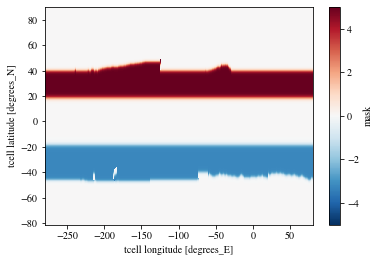

In [6]:
offset.mask.plot()

In [7]:
# For positive offsets

lw_heat_new = lw_heat.lw_heat + offset.fillna(0).mask
lw_heat_new = lw_heat_new.rename('lw_heat')

from netCDF4 import Dataset
lw_heat_ds = lw_heat_new.to_dataset()
lw_heat_ds.to_netcdf(path = '/scratch/x77/db6174/025deg_inputs/flux_forced_pos10W_NST_neg10W_SST/lw_heat_offset.nc', mode = 'w', format = "NETCDF4", engine = "netcdf4")

In [8]:
# For negative offsets

lw_heat_new = lw_heat.lw_heat - offset.fillna(0).mask
lw_heat_new = lw_heat_new.rename('lw_heat')

from netCDF4 import Dataset
lw_heat_ds = lw_heat_new.to_dataset()
lw_heat_ds.to_netcdf(path = '/scratch/x77/db6174/025deg_inputs/flux_forced_neg10W_NH/lw_heat_offset.nc', mode = 'w', format = "NETCDF4", engine = "netcdf4")

## Strict net zero heat

In [ ]:
# GLobally additive heat (w/m2)
gaf = 0.32

In [ ]:
import xarray as xr

var_list = ['sw_flux_vis_dir', 'sw_flux_nir_dir', 'sw_flux_vis_dif', 'sw_flux_nir_dif']

for i, j in enumerate(var_list):
    nc_file = '/scratch/x77/db6174/025deg_inputs/flux_forced_3hourly_20yr_avg/' + j + '_new.nc'
    heat_old = xr.open_dataset(nc_file)
    heat_new = heat_old.to_array().mean('variable') - gaf
    heat_new = heat_new.rename(j)
    heat_new_ds = heat_new.to_dataset()
    heat_new_ds.to_netcdf(path = '/scratch/x77/db6174/025deg_inputs/flux_forced_3hourly_net_zero_heat/' + j + '_zero_heat.nc', mode = 'w', format = "NETCDF4", engine = "netcdf4")

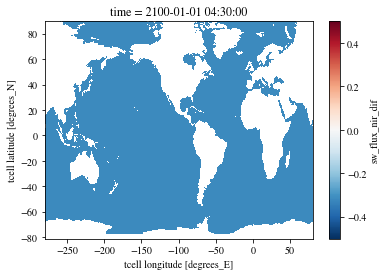

In [ ]:
nc_file1 = '/scratch/x77/db6174/025deg_inputs/flux_forced_3hourly_20yr_avg/sw_flux_nir_dif_new.nc'
heat_old = xr.open_dataset(nc_file1)

nc_file2 = '/scratch/x77/db6174/025deg_inputs/flux_forced_3hourly_net_zero_heat/sw_flux_nir_dif_zero_heat.nc'
heat_new = xr.open_dataset(nc_file2)

(heat_new.sw_flux_nir_dif - heat_old.sw_flux_nir_dif).isel(time = 1).plot(vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r')